In [1]:
import numpy as np
import itertools
from itertools import chain, combinations
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def generate_data(nrows, ncols):
    return np.random.choice([0, 1], size=(nrows, ncols), p=[0.9, 0.1])
    

In [3]:
generate_data(10,5)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [4]:
def findsubsets(S,m):
    '''finds subsets of S of size m'''
    return list(itertools.combinations(S, m))

In [5]:
def powerset(seq):
    """
    Returns all the subsets of this set. This is a generator.
    """
    if len(seq) <= 1:
        yield seq
        yield []
    else:
        for item in powerset(seq[1:]):
            yield [seq[0]]+item
            yield item

In [6]:
def count_distinct(index_list, data, subset_size):
    '''index_list must be a list or array in {0,...,d}.
    Generates all subsets and prints the length subset_size ones.'''
    if (type(index_list) != list):
        index_list = list(index_list)
        
    
    A = data
    print("Number unique items in data: {}".format(len(np.unique(A, axis=0))))
    #print(A)
    n,d = A.shape
    T = index_list
    
    if len(T) > d: # catch error when T is too large
        raise ValueError("T is {} but must be at most {}".format(len(T),d))
    subsets = powerset(T) 
    max_diversity = 0
    max_diversity_indices = []
    counter = 0
    for subcube in powerset(T):
        if len(subcube) == subset_size:
            #counter += 1
            A_subcube = A[:,subcube]
            diversity = len(np.unique(A_subcube, axis=0))
            print("subcube {}, No. unique items {}".format(subcube,\
                                                diversity))
            
            if (diversity >= max_diversity):
                max_diversity_indices.append(subcube)
                max_diversity = diversity       
            
    return max_diversity, max_diversity_indices#, counter        

In [12]:
A = generate_data(20,6)
#B = generate_data(10,5)
#C = np.c_[A,B]

In [13]:
A

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [14]:
A_max_div, A_max_div_ids = count_distinct(range(A.shape[1]), A, subset_size=5)

Number unique items in data: 9
subcube [1, 2, 3, 4, 5], No. unique items 7
subcube [0, 2, 3, 4, 5], No. unique items 7
subcube [0, 1, 3, 4, 5], No. unique items 8
subcube [0, 1, 2, 4, 5], No. unique items 7
subcube [0, 1, 2, 3, 5], No. unique items 8
subcube [0, 1, 2, 3, 4], No. unique items 8


In [15]:
A_max_div, A_max_div_ids = count_distinct(range(A.shape[1]), A, subset_size=4)

Number unique items in data: 9
subcube [2, 3, 4, 5], No. unique items 6
subcube [1, 3, 4, 5], No. unique items 6
subcube [0, 3, 4, 5], No. unique items 6
subcube [1, 2, 4, 5], No. unique items 5
subcube [0, 2, 4, 5], No. unique items 5
subcube [0, 1, 4, 5], No. unique items 6
subcube [1, 2, 3, 5], No. unique items 6
subcube [0, 2, 3, 5], No. unique items 6
subcube [0, 1, 3, 5], No. unique items 7
subcube [0, 1, 2, 5], No. unique items 6
subcube [1, 2, 3, 4], No. unique items 6
subcube [0, 2, 3, 4], No. unique items 5
subcube [0, 1, 3, 4], No. unique items 7
subcube [0, 1, 2, 4], No. unique items 6
subcube [0, 1, 2, 3], No. unique items 7


In [16]:
A_max_div, A_max_div_ids = count_distinct(range(A.shape[1]), A, subset_size=3)

Number unique items in data: 9
subcube [3, 4, 5], No. unique items 5
subcube [2, 4, 5], No. unique items 4
subcube [1, 4, 5], No. unique items 4
subcube [0, 4, 5], No. unique items 4
subcube [2, 3, 5], No. unique items 5
subcube [1, 3, 5], No. unique items 5
subcube [0, 3, 5], No. unique items 5
subcube [1, 2, 5], No. unique items 4
subcube [0, 2, 5], No. unique items 4
subcube [0, 1, 5], No. unique items 5
subcube [2, 3, 4], No. unique items 4
subcube [1, 3, 4], No. unique items 5
subcube [0, 3, 4], No. unique items 4
subcube [1, 2, 4], No. unique items 4
subcube [0, 2, 4], No. unique items 4
subcube [0, 1, 4], No. unique items 5
subcube [1, 2, 3], No. unique items 5
subcube [0, 2, 3], No. unique items 4
subcube [0, 1, 3], No. unique items 6
subcube [0, 1, 2], No. unique items 5


In [31]:
A_max_div, A_max_div_ids = count_distinct(range(A.shape[1]), A, subset_size=2)

Number unique items in data: 14
subcube [4, 5], No. unique items 4
subcube [3, 5], No. unique items 4
subcube [2, 5], No. unique items 3
subcube [1, 5], No. unique items 3
subcube [0, 5], No. unique items 4
subcube [3, 4], No. unique items 4
subcube [2, 4], No. unique items 3
subcube [1, 4], No. unique items 3
subcube [0, 4], No. unique items 3
subcube [2, 3], No. unique items 4
subcube [1, 3], No. unique items 4
subcube [0, 3], No. unique items 4
subcube [1, 2], No. unique items 3
subcube [0, 2], No. unique items 3
subcube [0, 1], No. unique items 3


### Frequency plotting (may not be necessary)

In [148]:
def plot_frequency(diverse_ids, data_name):
    '''Plots the bar chart showing the frequency of an index in
    subcubes which are diverse.
    Data name should be a string'''
    diverse_multiset = np.ravel(diverse_ids)
    subcube_index, counts = np.unique(np.ravel(diverse_ids), return_counts=True)
    fig,ax = plt.subplots()
    ax.bar(x=subcube_index, height=counts)
    ax.set_xlabel("Index")
    ax.set_xticks(subcube_index)
    ax.set_ylabel("Count in diverse set")
    ax.set_title("Index counts in diverse sets for data {}".format(data_name))

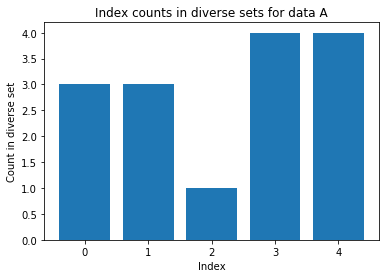

In [250]:
plot_frequency(A_max_div_ids, "A")

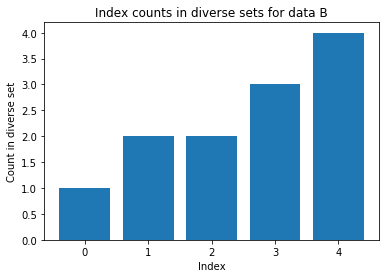

In [251]:
plot_frequency(B_max_div_ids, "B")

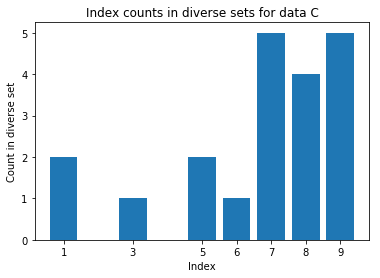

In [252]:
plot_frequency(C_max_div_ids, "C")

### Leverage score approach
Can we calculate column leverage scores and use these to guide which rows should be kept?

In [378]:
from numpy.linalg import norm

def column_leverage(matrix):
    A = matrix
    n,d = A.shape
    q,r = np.linalg.qr(A)
    row_norms = norm(A, axis=0)**2 / norm(A, ord='fro')
    return row_norms

In [379]:
column_leverage(A)

array([ 1.30930734,  0.21821789,  0.65465367,  1.09108945,  1.30930734])

In [383]:
A_max_div, A_max_div_ids = count_distinct(range(A.shape[1]), A, subset_size=3)

Number unique items in data: 10
subcube [2, 3, 4], No. unique items 7
subcube [1, 3, 4], No. unique items 5
subcube [0, 3, 4], No. unique items 8
subcube [1, 2, 4], No. unique items 5
subcube [0, 2, 4], No. unique items 6
subcube [0, 1, 4], No. unique items 5
subcube [1, 2, 3], No. unique items 5
subcube [0, 2, 3], No. unique items 7
subcube [0, 1, 3], No. unique items 5
subcube [0, 1, 2], No. unique items 5


In [384]:
A_max_div_ids

[[2, 3, 4], [0, 3, 4]]

In [385]:
column_leverage(B)

array([ 0.8,  0.8,  1.4,  1.2,  0.8])

In [386]:
B_max_div, B_max_div_ids = count_distinct(range(B.shape[1]), B, subset_size=3)

Number unique items in data: 8
subcube [2, 3, 4], No. unique items 6
subcube [1, 3, 4], No. unique items 7
subcube [0, 3, 4], No. unique items 5
subcube [1, 2, 4], No. unique items 6
subcube [0, 2, 4], No. unique items 6
subcube [0, 1, 4], No. unique items 6
subcube [1, 2, 3], No. unique items 6
subcube [0, 2, 3], No. unique items 5
subcube [0, 1, 3], No. unique items 5
subcube [0, 1, 2], No. unique items 6


In [387]:
B_max_div_ids

[[2, 3, 4], [1, 3, 4]]